## Normalizing the Data

In [1]:
import pandas as pd
import numpy as np
import ast

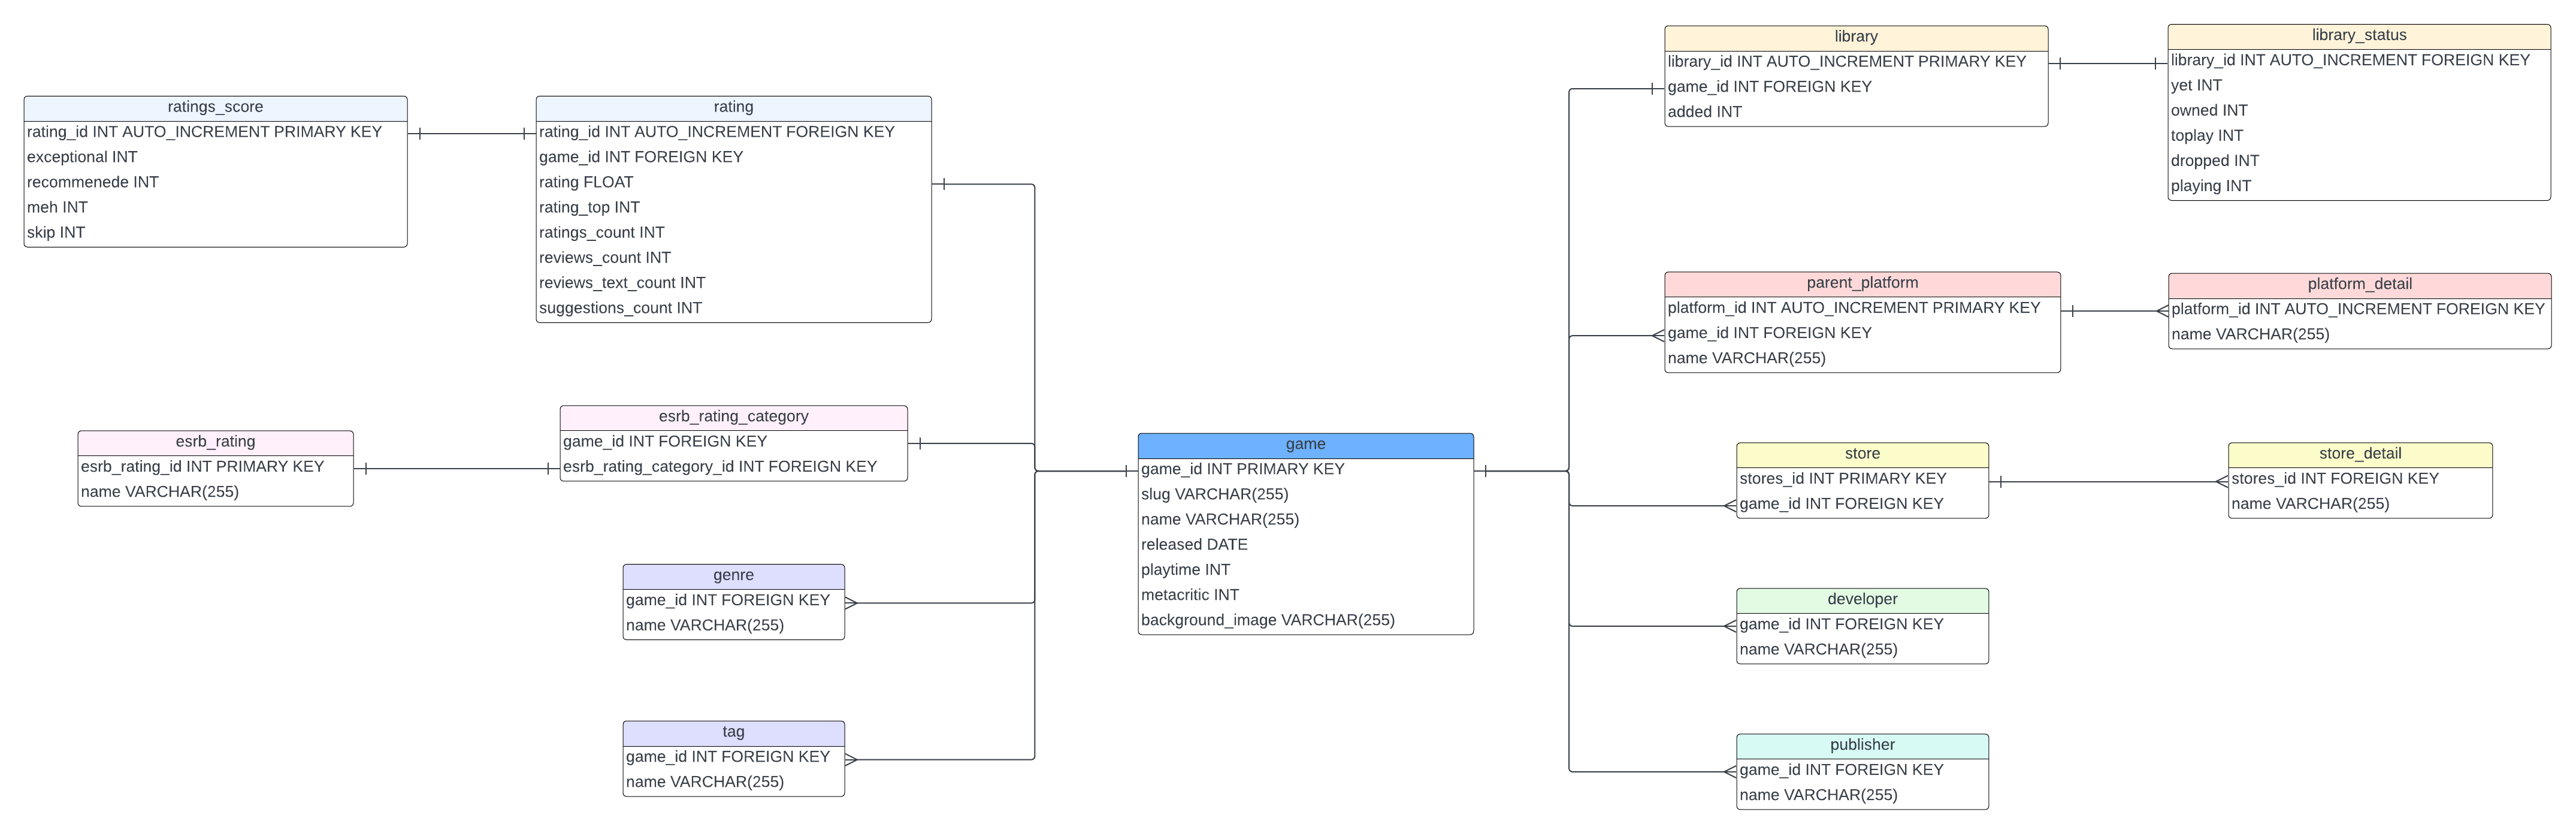

In [2]:
%matplotlib inline
from IPython.display import Image
Image('../Resources/rawg_db_schema.png')

In [3]:
pd.set_option('display.max_columns', None)

games_df_updated = pd.read_csv('../Data/game_data_updated.csv')
games_df_updated = games_df_updated.drop('Unnamed: 0', axis=1)
games_df_updated.rename(columns={'id': 'game_id'}, inplace=True)            #Rename id
games_df_updated.head()

,game_id,slug,name,released,background_image,rating,rating_top,ratings,ratings_count,reviews_text_count,added,added_by_status,metacritic,playtime,suggestions_count,reviews_count,platforms,parent_platforms,genres,stores,tags,esrb_rating,developer,publisher
0,3498,grand-theft-auto-v,Grand Theft Auto V,2013-09-17,https://media.rawg.io/media/games/20a/20aa03a1...,4.47,5,"[{'id': 5, 'title': 'exceptional', 'count': 39...",6651,57,20382,"{'yet': 515, 'owned': 11714, 'beaten': 5756, '...",92.0,74,428,6750,"[{'platform': {'id': 187, 'name': 'PlayStation...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 290375, 'store': {'id': 3, 'name': 'Pl...","[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","['Rockstar Games', 'Rockstar North']",['Rockstar Games']
1,3328,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,2015-05-18,https://media.rawg.io/media/games/618/618c2031...,4.66,5,"[{'id': 5, 'title': 'exceptional', 'count': 50...",6379,70,19700,"{'yet': 1098, 'owned': 11369, 'beaten': 4695, ...",92.0,46,674,6481,"[{'platform': {'id': 5, 'name': 'macOS', 'slug...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 354780, 'store': {'id': 5, 'name': 'GO...","[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}",['CD PROJEKT RED'],['CD PROJEKT RED']
2,4200,portal-2,Portal 2,2011-04-18,https://media.rawg.io/media/games/2ba/2bac0e87...,4.61,5,"[{'id': 5, 'title': 'exceptional', 'count': 39...",5533,34,18602,"{'yet': 607, 'owned': 11524, 'beaten': 5390, '...",95.0,11,547,5585,"[{'platform': {'id': 16, 'name': 'PlayStation ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 2, 'name': 'Shooter', 'slug': 'shooter...","[{'id': 465889, 'store': {'id': 2, 'name': 'Xb...","[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve...",['Valve Software'],"['Electronic Arts', 'Valve']"
3,4291,counter-strike-global-offensive,Counter-Strike: Global Offensive,2012-08-21,https://media.rawg.io/media/games/736/73619bd3...,3.57,4,"[{'id': 4, 'title': 'recommended', 'count': 16...",3398,26,16268,"{'yet': 257, 'owned': 12342, 'beaten': 1002, '...",81.0,65,587,3433,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 4619, 'store': {'id': 3, 'name': 'Play...","[{'id': 40847, 'name': 'Steam Achievements', '...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}","['Valve Software', 'Hidden Path Entertainment']",['Valve']
4,5286,tomb-raider,Tomb Raider (2013),2013-03-05,https://media.rawg.io/media/games/021/021c4e21...,4.05,4,"[{'id': 4, 'title': 'recommended', 'count': 23...",3823,13,16162,"{'yet': 668, 'owned': 10471, 'beaten': 4132, '...",86.0,10,646,3851,"[{'platform': {'id': 18, 'name': 'PlayStation ...","[{'platform': {'id': 1, 'name': 'PC', 'slug': ...","[{'id': 4, 'name': 'Action', 'slug': 'action',...","[{'id': 33824, 'store': {'id': 7, 'name': 'Xbo...","[{'id': 31, 'name': 'Singleplayer', 'slug': 's...","{'id': 4, 'name': 'Mature', 'slug': 'mature'}",['Crystal Dynamics'],['Square Enix']


### Subset the data according to the schema

In [4]:
# Games
games = games_df_updated[['game_id', 'slug', 'name', 'released', 'playtime', 'metacritic', 'background_image']]

# ESRB_Rating
esrb_rating_category = games_df_updated[['game_id', 'esrb_rating']]
esrb_rating = games_df_updated[['esrb_rating']]

# Ratings
ratings = games_df_updated[['game_id', 'rating', 'rating_top', 'ratings_count', 'reviews_count', 'reviews_text_count', 'suggestions_count']]
ratings_score = games_df_updated[['ratings']]

# Library
collection = games_df_updated[['game_id', 'added']]
collection_status = games_df_updated[['added_by_status']]

# Platform
parent_platforms = games_df_updated[['game_id', 'parent_platforms']]
platforms_detail = games_df_updated[['platforms']]

# Store
stores = games_df_updated[['game_id', 'stores']]
stores_detail = games_df_updated[['stores']]

# Genre
genres = games_df_updated[['game_id', 'genres']]

# Tag
tags = games_df_updated[['game_id', 'tags']]

# Developer
developers = games_df_updated[['game_id', 'developer']]

# Publisher
publishers = games_df_updated[['game_id', 'publisher']]

### Data Preparation

#### games_data

In [5]:
games

,game_id,slug,name,released,playtime,metacritic,background_image
0,3498,grand-theft-auto-v,Grand Theft Auto V,2013-09-17,74,92.0,https://media.rawg.io/media/games/20a/20aa03a1...
1,3328,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,2015-05-18,46,92.0,https://media.rawg.io/media/games/618/618c2031...
2,4200,portal-2,Portal 2,2011-04-18,11,95.0,https://media.rawg.io/media/games/2ba/2bac0e87...
3,4291,counter-strike-global-offensive,Counter-Strike: Global Offensive,2012-08-21,65,81.0,https://media.rawg.io/media/games/736/73619bd3...
4,5286,tomb-raider,Tomb Raider (2013),2013-03-05,10,86.0,https://media.rawg.io/media/games/021/021c4e21...
...,...,...,...,...,...,...,...
159555,905411,hallways12345,Hallways12345,2023-01-02,0,NaN,https://media.rawg.io/media/screenshots/dbc/db...
159556,905410,diari-demo,Diari Demo,2023-01-02,0,NaN,https://media.rawg.io/media/screenshots/608/60...
159557,905409,tugas7-navigation-mesh,Tugas7 - Navigation Mesh,2023-01-02,0,NaN,https://media.rawg.io/media/screenshots/ed0/ed...
159558,905408,a56liu-yi-xuan-fan-hang-httpsitchiosales,A56劉羿萱返航https://itch.io/sales,2023-01-02,0,NaN,https://media.rawg.io/media/screenshots/6d5/6d...


Keep it as is.

#### esrb_rating_cat_data

In [6]:
esrb_rating_category.head()

,game_id,esrb_rating
0,3498,"{'id': 4, 'name': 'Mature', 'slug': 'mature'}"
1,3328,"{'id': 4, 'name': 'Mature', 'slug': 'mature'}"
2,4200,"{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve..."
3,4291,"{'id': 4, 'name': 'Mature', 'slug': 'mature'}"
4,5286,"{'id': 4, 'name': 'Mature', 'slug': 'mature'}"


Extract the id number to create a esrb_rating_id column.

In [7]:
esrb_rating_category = esrb_rating_category.copy()

In [8]:
esrb_rating_category['esrb_rating_id'] = esrb_rating_category['esrb_rating'].apply(lambda x: ast.literal_eval(x)['id'] if pd.notnull(x) else None)

In [9]:
esrb_rating_category.drop('esrb_rating', axis=1, inplace=True)

In [10]:
esrb_rating_category

,game_id,esrb_rating_id
0,3498,4.0
1,3328,4.0
2,4200,2.0
3,4291,4.0
4,5286,4.0
...,...,...
159555,905411,NaN
159556,905410,NaN
159557,905409,NaN
159558,905408,NaN


I intend to use the esrb_rating_id as a primary key however there are null values and duplicates. To remedy this I checked the rawg.io website and found out that null values were games that were simply not rated thus I can use 'id':0, 'name': 'Not rated' accordingly.

In [11]:
esrb_rating_category['esrb_rating_id'].fillna(0, inplace=True)
esrb_rating_category['esrb_rating_id'] = esrb_rating_category['esrb_rating_id'].astype(int)

In [12]:
esrb_rating_category

,game_id,esrb_rating_id
0,3498,4
1,3328,4
2,4200,2
3,4291,4
4,5286,4
...,...,...
159555,905411,0
159556,905410,0
159557,905409,0
159558,905408,0


#### esrb_rating_data

In [13]:
esrb_rating = pd.concat([esrb_rating_category, esrb_rating], axis=1)
esrb_rating.drop('game_id', axis=1, inplace=True)
esrb_rating.head()

,esrb_rating_id,esrb_rating
0,4,"{'id': 4, 'name': 'Mature', 'slug': 'mature'}"
1,4,"{'id': 4, 'name': 'Mature', 'slug': 'mature'}"
2,2,"{'id': 2, 'name': 'Everyone 10+', 'slug': 'eve..."
3,4,"{'id': 4, 'name': 'Mature', 'slug': 'mature'}"
4,4,"{'id': 4, 'name': 'Mature', 'slug': 'mature'}"


Extract the name of the esrb rating.

In [14]:
esrb_rating = esrb_rating.copy()

In [15]:
esrb_rating['name'] = esrb_rating['esrb_rating'].apply(lambda x: ast.literal_eval(x)['name'] if pd.notnull(x) else None)

In [16]:
esrb_rating.drop('esrb_rating', axis=1, inplace=True)

In [17]:
esrb_rating

,esrb_rating_id,name
0,4,Mature
1,4,Mature
2,2,Everyone 10+
3,4,Mature
4,4,Mature
...,...,...
159555,0,None
159556,0,None
159557,0,None
159558,0,None


Follow the convention preiously mentioned withe the id.

In [18]:
esrb_rating['name'] = esrb_rating['name'].fillna('Not Rated')

In [19]:
esrb_rating

,esrb_rating_id,name
0,4,Mature
1,4,Mature
2,2,Everyone 10+
3,4,Mature
4,4,Mature
...,...,...
159555,0,Not Rated
159556,0,Not Rated
159557,0,Not Rated
159558,0,Not Rated


Remove duplicates to have only single records for each id and its corresponding name.

In [20]:
esrb_rating.drop_duplicates(subset=['esrb_rating_id', 'name'], inplace=True)

In [21]:
esrb_rating

,esrb_rating_id,name
0,4,Mature
2,2,Everyone 10+
5,3,Teen
19,5,Adults Only
25,0,Not Rated
26,1,Everyone
65,6,Rating Pending


#### ratings_data

In [22]:
ratings

,game_id,rating,rating_top,ratings_count,reviews_count,reviews_text_count,suggestions_count
0,3498,4.47,5,6651,6750,57,428
1,3328,4.66,5,6379,6481,70,674
2,4200,4.61,5,5533,5585,34,547
3,4291,3.57,4,3398,3433,26,587
4,5286,4.05,4,3823,3851,13,646
...,...,...,...,...,...,...,...
159555,905411,0.00,0,0,0,0,23
159556,905410,0.00,0,0,0,0,103
159557,905409,0.00,0,0,0,0,2
159558,905408,0.00,0,0,0,0,5


Keep it as is.

#### ratings_score_data

In [23]:
ratings_score

,ratings
0,"[{'id': 5, 'title': 'exceptional', 'count': 39..."
1,"[{'id': 5, 'title': 'exceptional', 'count': 50..."
2,"[{'id': 5, 'title': 'exceptional', 'count': 39..."
3,"[{'id': 4, 'title': 'recommended', 'count': 16..."
4,"[{'id': 4, 'title': 'recommended', 'count': 23..."
...,...
159555,[]
159556,[]
159557,[]
159558,[]


This is a different scenario compared to the esrb ratings since there is an acutal count tied to the id of each score. Adjust the ratings column to make new columns which corresponds to its title and the values for it are the count.

In [24]:
ratings_score = ratings_score.copy()

In [25]:
ratings_score['ratings'] = ratings_score['ratings'].apply(ast.literal_eval)

In [26]:
def RSD_extract_count_by_title(ratings):
    title_count = {}
    for item in ratings:
        title_count[item['title']] = item['count']
    return pd.Series(title_count)

In [27]:
new_RSD_columns = ratings_score['ratings'].apply(RSD_extract_count_by_title)

In [28]:
ratings_score = pd.concat([ratings_score, new_RSD_columns], axis=1)

In [29]:
ratings_score = ratings_score.drop(columns=['ratings'])

In [30]:
ratings_score

,exceptional,recommended,meh,skip
0,3991.0,2206.0,429.0,124.0
1,5002.0,1045.0,273.0,161.0
2,3926.0,1388.0,150.0,121.0
3,552.0,1604.0,894.0,383.0
4,978.0,2333.0,422.0,118.0
...,...,...,...,...
159555,NaN,NaN,NaN,NaN
159556,NaN,NaN,NaN,NaN
159557,NaN,NaN,NaN,NaN
159558,NaN,NaN,NaN,NaN


#### collection_data

In [31]:
collection

,game_id,added
0,3498,20382
1,3328,19700
2,4200,18602
3,4291,16268
4,5286,16162
...,...,...
159555,905411,0
159556,905410,0
159557,905409,0
159558,905408,0


Keep it as is.

#### collection_status_data

In [32]:
collection_status

,added_by_status
0,"{'yet': 515, 'owned': 11714, 'beaten': 5756, '..."
1,"{'yet': 1098, 'owned': 11369, 'beaten': 4695, ..."
2,"{'yet': 607, 'owned': 11524, 'beaten': 5390, '..."
3,"{'yet': 257, 'owned': 12342, 'beaten': 1002, '..."
4,"{'yet': 668, 'owned': 10471, 'beaten': 4132, '..."
...,...
159555,NaN
159556,NaN
159557,NaN
159558,NaN


Adjust this data frame similar to the ratings data frame.

In [33]:
collection_status = collection_status.copy()

In [34]:
collection_status['added_by_status'] = collection_status['added_by_status'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) else {})

In [35]:
keys = set().union(*(d.keys() for d in collection_status['added_by_status']))

In [36]:
for key in keys:
    collection_status.loc[:, key] = collection_status['added_by_status'].apply(lambda x: x.get(key, 0))

In [37]:
collection_status.drop('added_by_status', axis=1, inplace=True)

In [38]:
collection_status

,owned,beaten,dropped,yet,playing,toplay
0,11714,5756,1075,515,718,604
1,11369,4695,915,1098,865,758
2,11524,5390,573,607,145,363
3,12342,1002,1961,257,630,76
4,10471,4132,528,668,106,257
...,...,...,...,...,...,...
159555,0,0,0,0,0,0
159556,0,0,0,0,0,0
159557,0,0,0,0,0,0
159558,0,0,0,0,0,0


#### parent_platforms_data

In [39]:
parent_platforms

,game_id,parent_platforms
0,3498,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ..."
1,3328,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ..."
2,4200,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ..."
3,4291,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ..."
4,5286,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ..."
...,...,...
159555,905411,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ..."
159556,905410,"[{'platform': {'id': 1, 'name': 'PC', 'slug': ..."
159557,905409,"[{'platform': {'id': 14, 'name': 'Web', 'slug'..."
159558,905408,"[{'platform': {'id': 14, 'name': 'Web', 'slug'..."


Adjust the column to only filter the names of the specific parent platform.

In [40]:
parent_platforms = parent_platforms.copy()

In [41]:
def PPD_extract_names(row):
    platforms_list = ast.literal_eval(row)
    names = [platform['platform']['name'] for platform in platforms_list]
    return ', '.join(names) if names else None

In [42]:
parent_platforms['name'] = parent_platforms['parent_platforms'].apply(PPD_extract_names)

In [43]:
parent_platforms.drop('parent_platforms', axis=1, inplace=True)

In [44]:
parent_platforms

,game_id,name
0,3498,"PC, PlayStation, Xbox"
1,3328,"PC, PlayStation, Xbox, Apple Macintosh, Nintendo"
2,4200,"PC, PlayStation, Xbox, Apple Macintosh, Linux"
3,4291,"PC, PlayStation, Xbox"
4,5286,"PC, PlayStation, Xbox, Apple Macintosh"
...,...,...
159555,905411,PC
159556,905410,PC
159557,905409,Web
159558,905408,Web


#### platforms_data 

In [45]:
platforms_detail

,platforms
0,"[{'platform': {'id': 187, 'name': 'PlayStation..."
1,"[{'platform': {'id': 5, 'name': 'macOS', 'slug..."
2,"[{'platform': {'id': 16, 'name': 'PlayStation ..."
3,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ..."
4,"[{'platform': {'id': 18, 'name': 'PlayStation ..."
...,...
159555,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ..."
159556,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ..."
159557,"[{'platform': {'id': 171, 'name': 'Web', 'slug..."
159558,"[{'platform': {'id': 171, 'name': 'Web', 'slug..."


Same as parent plaform filtering.

In [46]:
platforms_detail = platforms_detail.copy()

In [47]:
def PD_extract_names(row):
    platforms_list = ast.literal_eval(row)
    names = [platform['platform']['name'] for platform in platforms_list]
    return ', '.join(names) if names else None

In [48]:
platforms_detail['name'] = platforms_detail['platforms'].apply(PD_extract_names)

In [49]:
platforms_detail.drop('platforms', axis=1, inplace=True)

In [50]:
platforms_detail

,name
0,"PlayStation 5, Xbox Series S/X, PC, PlayStatio..."
1,"macOS, PlayStation 4, Nintendo Switch, PC, Xbo..."
2,"PlayStation 3, PC, Xbox 360, Linux, macOS, Xbo..."
3,"PC, Xbox 360, PlayStation 3"
4,"PlayStation 4, macOS, PC, Xbox One, Xbox 360, ..."
...,...
159555,PC
159556,PC
159557,Web
159558,Web


#### stores_data 

In [51]:
stores

,game_id,stores
0,3498,"[{'id': 290375, 'store': {'id': 3, 'name': 'Pl..."
1,3328,"[{'id': 354780, 'store': {'id': 5, 'name': 'GO..."
2,4200,"[{'id': 465889, 'store': {'id': 2, 'name': 'Xb..."
3,4291,"[{'id': 4619, 'store': {'id': 3, 'name': 'Play..."
4,5286,"[{'id': 33824, 'store': {'id': 7, 'name': 'Xbo..."
...,...,...
159555,905411,"[{'id': 903606, 'store': {'id': 9, 'name': 'it..."
159556,905410,"[{'id': 903605, 'store': {'id': 9, 'name': 'it..."
159557,905409,"[{'id': 903604, 'store': {'id': 9, 'name': 'it..."
159558,905408,"[{'id': 903603, 'store': {'id': 9, 'name': 'it..."


Adjust to filter only id of the stores.

In [52]:
stores = stores.copy()

In [53]:
stores['stores'] = stores['stores'].apply(ast.literal_eval)

In [54]:
def extract_first_id(row):
    if len(row['stores']) > 0:
        return row['stores'][0]['id']
    else:
        return None

In [55]:
stores['store_id'] = stores.apply(extract_first_id, axis=1)

In [56]:
stores.drop('stores', axis=1, inplace=True)

In [57]:
stores

,game_id,store_id
0,3498,290375.0
1,3328,354780.0
2,4200,465889.0
3,4291,4619.0
4,5286,33824.0
...,...,...
159555,905411,903606.0
159556,905410,903605.0
159557,905409,903604.0
159558,905408,903603.0


#### stores_detail_data 

In [58]:
stores_detail = pd.concat([stores, stores_detail], axis=1)
stores_detail.drop('game_id', axis=1, inplace=True)
stores_detail

,store_id,stores
0,290375.0,"[{'id': 290375, 'store': {'id': 3, 'name': 'Pl..."
1,354780.0,"[{'id': 354780, 'store': {'id': 5, 'name': 'GO..."
2,465889.0,"[{'id': 465889, 'store': {'id': 2, 'name': 'Xb..."
3,4619.0,"[{'id': 4619, 'store': {'id': 3, 'name': 'Play..."
4,33824.0,"[{'id': 33824, 'store': {'id': 7, 'name': 'Xbo..."
...,...,...
159555,903606.0,"[{'id': 903606, 'store': {'id': 9, 'name': 'it..."
159556,903605.0,"[{'id': 903605, 'store': {'id': 9, 'name': 'it..."
159557,903604.0,"[{'id': 903604, 'store': {'id': 9, 'name': 'it..."
159558,903603.0,"[{'id': 903603, 'store': {'id': 9, 'name': 'it..."


Adjust to filter only names of the stores.

In [59]:
stores_detail = stores_detail.copy()

In [60]:
def SD_extract_names(row):
    stores_list = ast.literal_eval(row)
    names = [store['store']['name'] for store in stores_list]
    return ', '.join(names) if names else None

In [61]:
stores_detail['name'] = stores_detail['stores'].apply(SD_extract_names)

In [62]:
stores_detail.drop('stores', axis=1, inplace=True)

In [63]:
stores_detail

,store_id,name
0,290375.0,"PlayStation Store, Epic Games, Steam, Xbox 360..."
1,354780.0,"GOG, PlayStation Store, Steam, Xbox Store, Nin..."
2,465889.0,"Xbox Store, Steam, PlayStation Store, Xbox 360..."
3,4619.0,"PlayStation Store, Steam, Xbox 360 Store"
4,33824.0,"Xbox 360 Store, Steam, PlayStation Store, Goog..."
...,...,...
159555,903606.0,itch.io
159556,903605.0,itch.io
159557,903604.0,itch.io
159558,903603.0,itch.io


#### genres_data

In [64]:
genres

,game_id,genres
0,3498,"[{'id': 4, 'name': 'Action', 'slug': 'action',..."
1,3328,"[{'id': 4, 'name': 'Action', 'slug': 'action',..."
2,4200,"[{'id': 2, 'name': 'Shooter', 'slug': 'shooter..."
3,4291,"[{'id': 4, 'name': 'Action', 'slug': 'action',..."
4,5286,"[{'id': 4, 'name': 'Action', 'slug': 'action',..."
...,...,...
159555,905411,[]
159556,905410,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven..."
159557,905409,[]
159558,905408,[]


Adjust to filter only the names of the genres.

In [65]:
genres = genres.copy()

In [66]:
def GD_extract_names(row):
    genres_list = ast.literal_eval(row)
    names = [genre['name'] for genre in genres_list]
    return ', '.join(names) if names else None

In [67]:
genres['genre'] = genres['genres'].apply(GD_extract_names)

In [68]:
genres.drop('genres', axis=1, inplace=True)

In [69]:
genres.head()

,game_id,genre
0,3498,"Action, Adventure"
1,3328,"Action, Adventure, RPG"
2,4200,"Shooter, Puzzle"
3,4291,"Action, Shooter"
4,5286,"Action, Adventure"


#### tags_data 

In [70]:
tags

,game_id,tags
0,3498,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's..."
1,3328,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's..."
2,4200,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's..."
3,4291,"[{'id': 40847, 'name': 'Steam Achievements', '..."
4,5286,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's..."
...,...,...
159555,905411,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's..."
159556,905410,"[{'id': 31, 'name': 'Singleplayer', 'slug': 's..."
159557,905409,[]
159558,905408,[]


Adjust to filter only the names of the tags.

In [71]:
tags = tags.copy()

In [72]:
def TD_extract_names(row):
    tags_list = ast.literal_eval(row)
    names = [tag['name'] for tag in tags_list]
    return ', '.join(names) if names else None

In [73]:
tags['tag'] = tags['tags'].apply(TD_extract_names)

In [74]:
tags.drop('tags', axis=1, inplace=True)
tags.rename(columns={'tag': 'tags'}, inplace=True)

In [75]:
tags.head()

,game_id,tags
0,3498,"Singleplayer, Steam Achievements, Multiplayer,..."
1,3328,"Singleplayer, Full controller support, Atmosph..."
2,4200,"Singleplayer, Steam Achievements, Multiplayer,..."
3,4291,"Steam Achievements, Multiplayer, Full controll..."
4,5286,"Singleplayer, Multiplayer, Full controller sup..."


#### developers_data 

In [76]:
developers

,game_id,developer
0,3498,"['Rockstar Games', 'Rockstar North']"
1,3328,['CD PROJEKT RED']
2,4200,['Valve Software']
3,4291,"['Valve Software', 'Hidden Path Entertainment']"
4,5286,['Crystal Dynamics']
...,...,...
159555,905411,['stathis0074']
159556,905410,['Lunziestella']
159557,905409,['Achmad Wildan']
159558,905408,['xuan2003']


Remove square brackets and ''.

In [77]:
developers = developers.copy()

In [78]:
developers['developer'] = developers['developer'].astype(str).str.replace('\[|\]', '', regex=True).str.replace("'", "")

In [79]:
developers

,game_id,developer
0,3498,"Rockstar Games, Rockstar North"
1,3328,CD PROJEKT RED
2,4200,Valve Software
3,4291,"Valve Software, Hidden Path Entertainment"
4,5286,Crystal Dynamics
...,...,...
159555,905411,stathis0074
159556,905410,Lunziestella
159557,905409,Achmad Wildan
159558,905408,xuan2003


#### publishers_data 

In [80]:
publishers

,game_id,publisher
0,3498,['Rockstar Games']
1,3328,['CD PROJEKT RED']
2,4200,"['Electronic Arts', 'Valve']"
3,4291,['Valve']
4,5286,['Square Enix']
...,...,...
159555,905411,[]
159556,905410,[]
159557,905409,[]
159558,905408,[]


Adjust this also just like the developers one.

In [81]:
publishers = publishers.copy()

In [82]:
publishers['publisher'] = publishers['publisher'].astype(str).str.replace('\[|\]', '', regex=True).str.replace("'", "")

In [83]:
publishers

,game_id,publisher
0,3498,Rockstar Games
1,3328,CD PROJEKT RED
2,4200,"Electronic Arts, Valve"
3,4291,Valve
4,5286,Square Enix
...,...,...
159555,905411,
159556,905410,
159557,905409,
159558,905408,
